# `forecast` Package Demonstration

For more information about the package, click [here](https://cran.r-project.org/web/packages/forecast/index.html)

In [9]:
library(forecast)


## Data

Data sets included in the package

- `gas`: Australian monthly gas production
- `gold`: Daily morning gold prices
- `taylor`: Half-hourly electricity demand
- `wineind`: Australian total wine sales
- `woolyrnq`: Quarterly production of woollen yarn in Australia


In [10]:
head(gas, 5*12)
gas_ts <- ts(gas, frequency = 12)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1956,1709,1646,1794,1878,2173,2321,2468,2416,2184,2121,1962,1825
1957,1751,1688,1920,1941,2311,2279,2638,2448,2279,2163,1941,1878
1958,1773,1688,1783,1984,2290,2511,2712,2522,2342,2195,1931,1910
1959,1730,1688,1899,1994,2342,2553,2712,2627,2363,2311,2026,1910
1960,1762,1815,2005,2089,2617,2828,2965,2891,2532,2363,2216,2026


In [11]:
head(gold, 5*12)
gold_ts <- ts(gold, frequency = 52)

A Time Series:
 [1] 306.25 299.50 303.45 296.75 304.40 298.35 304.00 304.00 301.25 302.50
[11] 302.45 305.80 306.90 307.00 306.85 302.15 301.90 299.25 298.60 303.50
[21] 303.00 304.90 304.80 301.25 301.75 303.45 302.50 300.60 300.00 303.45
[31] 302.80 303.40 304.90 304.95 302.90 302.85 302.00 298.80 290.00 285.00
[41] 290.75 290.50 288.10 288.30 288.85 286.70 289.30 289.00 290.25 288.75
[51] 290.10 290.25 289.90 293.70 307.25 333.25 312.50 320.75 315.90 316.00

In [12]:
head(taylor, 5*12)
taylor_ts <- ts(taylor, frequency = 24*2*365.25)

A Time Series:
 [1] 22262 21756 22247 22759 22549 22313 22128 21860 21751 21336 21363 22176
[13] 24649 27466 31020 33529 35428 36034 36834 37296 37338 37608 37692 37944
[25] 37880 37493 37065 36855 36871 36837 36603 36982 37369 37650 37413 36475
[37] 35486 34452 33704 32883 31940 32215 32572 32850 32251 30895 28460 26572
[49] 25093 24320 24684 25338 24943 24637 24424 24163 23943 23324 23412 24065
attr(,"msts")
[1]  48 336

In [13]:
head(wineind, 5*12)
wineind_ts <- ts(wineind, frequency = 12)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1980,15136,16733,20016,17708,18019,19227,22893,23739,21133,22591,26786,29740
1981,15028,17977,20008,21354,19498,22125,25817,28779,20960,22254,27392,29945
1982,16933,17892,20533,23569,22417,22084,26580,27454,24081,23451,28991,31386
1983,16896,20045,23471,21747,25621,23859,25500,30998,24475,23145,29701,34365
1984,17556,22077,25702,22214,26886,23191,27831,35406,23195,25110,30009,36242


In [14]:
head(woolyrnq, 5*12)
woolyrnq_ts <- ts(woolyrnq, frequency = 4)

,Qtr1,Qtr2,Qtr3,Qtr4
1965,6172,6709,6633,6660
1966,6786,6800,6730,6765
1967,6720,7133,6946,7095
1968,7047,6757,6915,6921
1969,7064,7206,7190,7402
1970,7819,7300,7105,7259
1971,7001,7475,6840,7061
1972,5845,7529,7819,6943
1973,5714,6556,7045,5947
1974,5463,6127,5540,4235


### Time Series Analysis

Examining the `wineind` dataset and applying some basic time series analysis functions.


In [17]:
# Find dominant frequency
dominant_frequency <- findfrequency(wineind_ts)
print(paste("Dominant Frequency:", dominant_frequency))

# Apply Box-Cox Transformation
lambda <- BoxCox.lambda(wineind_ts)
wine_ts_transformed <- BoxCox(wineind_ts, lambda)


[1] "Dominant Frequency: 4"


### Seasonal Decomposition

Decomposing the time series to understand its components better.


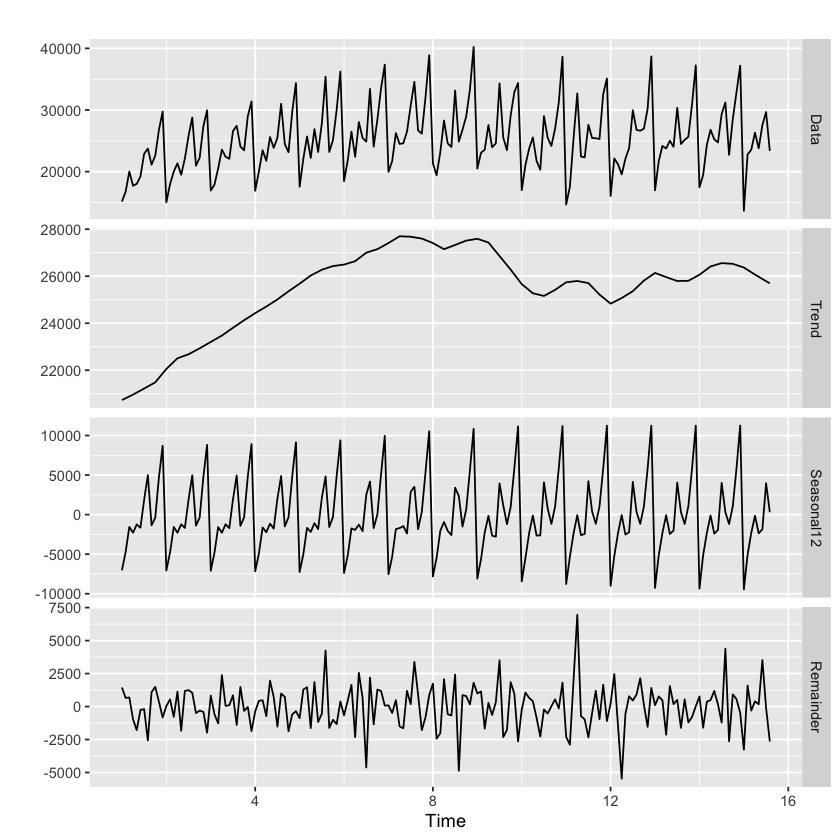

In [19]:
# Multiple seasonal decomposition
decomposed <- mstl(wineind_ts)
autoplot(decomposed)



### Modelling

Fitting an ARIMA model to the univariate time series.


In [20]:
# Fit ARIMA model
fit_arima <- auto.arima(wineind_ts)
summary(fit_arima)



Series: wineind_ts 
ARIMA(1,1,2)(0,1,1)[12] 

Coefficients:
         ar1      ma1     ma2     sma1
      0.4299  -1.4673  0.5339  -0.6600
s.e.  0.2984   0.2658  0.2340   0.0799

sigma^2 = 5399312:  log likelihood = -1497.05
AIC=3004.1   AICc=3004.48   BIC=3019.57

Training set error measures:
                    ME     RMSE      MAE       MPE    MAPE      MASE       ACF1
Training set -170.7415 2208.571 1619.979 -1.403046 6.55824 0.8234203 0.01025396

In [21]:
# Fit ETS model
fit_ets <- ets(wineind_ts)
summary(fit_ets)


ETS(M,Ad,M) 

Call:
 ets(y = wineind_ts) 

  Smoothing parameters:
    alpha = 0.0593 
    beta  = 1e-04 
    gamma = 0.2171 
    phi   = 0.9745 

  Initial states:
    l = 20530.7663 
    b = 178.8842 
    s = 1.3446 1.1965 0.994 0.9602 1.1733 1.0963
           0.9291 0.9323 0.9315 0.9345 0.8055 0.7021

  sigma:  0.0882

     AIC     AICc      BIC 
3637.995 3642.351 3695.063 

Training set error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE      ACF1
Training set -76.00535 2180.068 1626.666 -1.07131 6.611986 0.8268193 -0.108876


### Forecasting

Producing forecasts using the models we've estimated.


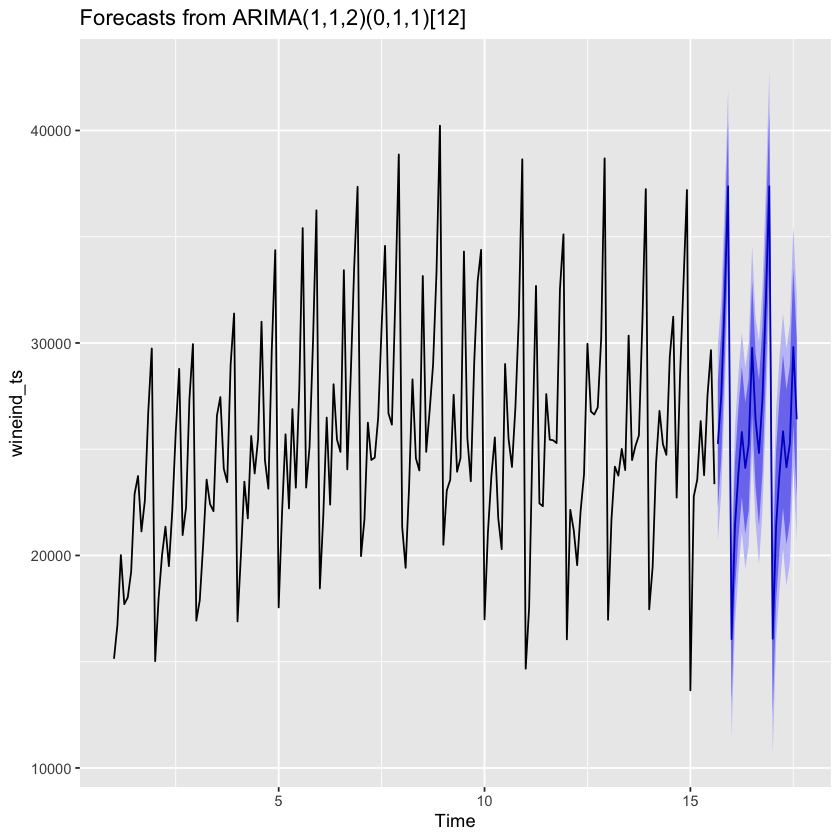

In [22]:
# Forecast using ARIMA
forecast_arima <- forecast(fit_arima, h = 24)
autoplot(forecast_arima)




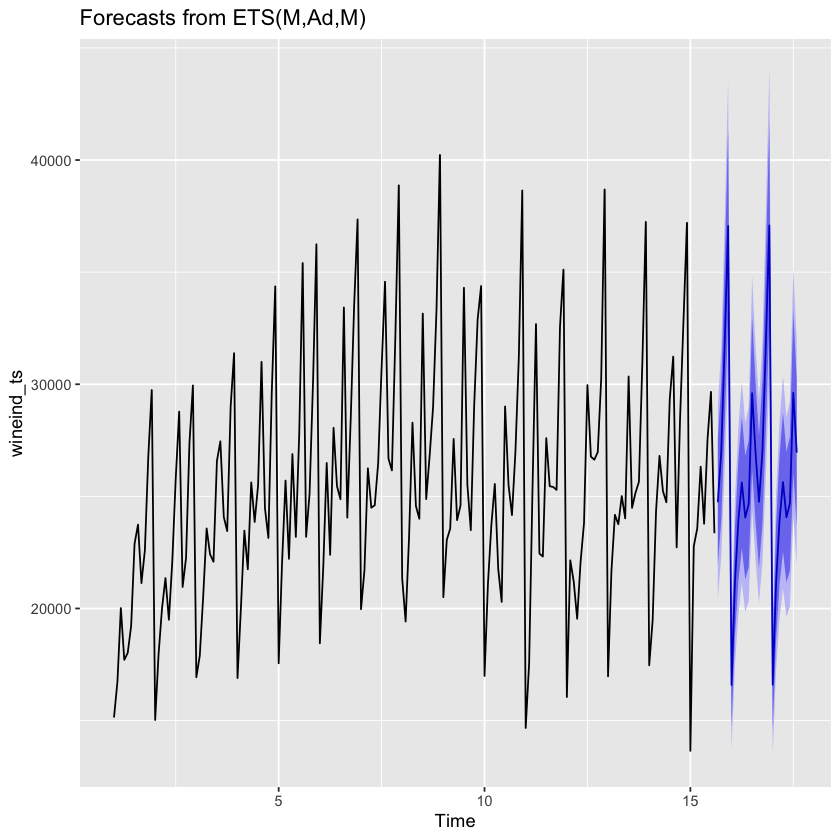

In [23]:
# Forecast using ETS
forecast_ets <- forecast(fit_ets, h = 24)
autoplot(forecast_ets)




### Plotting

We explore the data visually with some plotting functions.


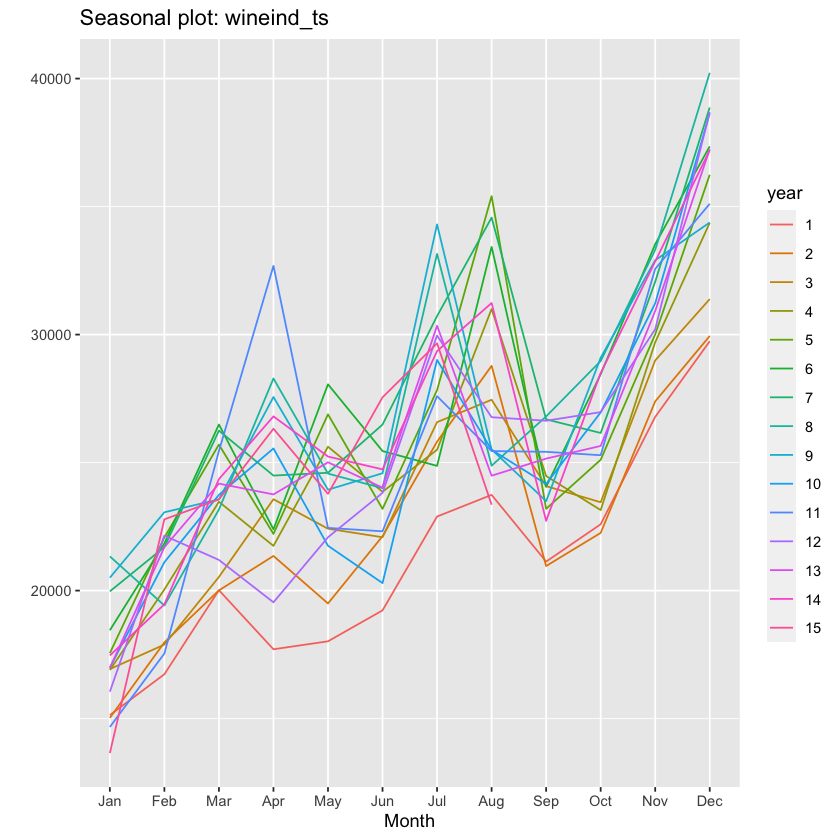

In [25]:
# Seasonal plot
ggseasonplot(wineind_ts)


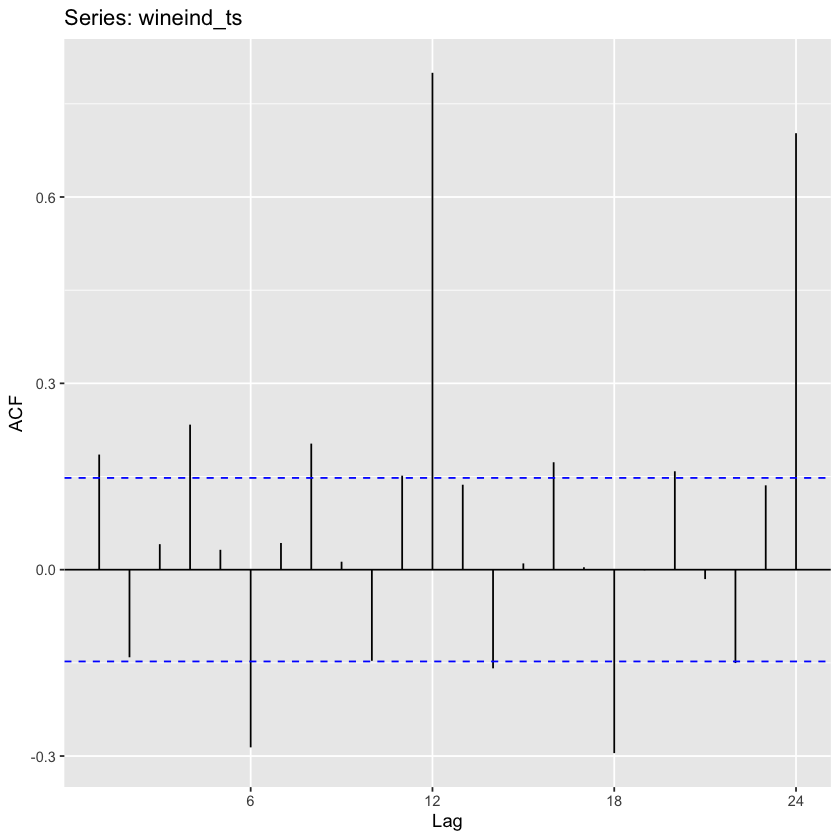

In [26]:
# Autocorrelation Function (ACF) plot
ggAcf(wineind_ts)
